<a href="https://colab.research.google.com/github/roner-rodrigues/AI-ML/blob/main/breast_cancer_classification_ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##***Classificação Linear do Dataset Breast Cancer***

---



## Importando as Bibliotecas Necessárias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import Perceptron
from google.colab import drive
drive.mount('/content/drive') # Montando o Google Drive na mesma conta do Google Colab

Mounted at /content/drive


## Carregando o Dataset

In [2]:
# Descrição do dataset: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
# Caminho do dataset no Google Drive que será carregado em df
df = pd.read_csv("/content/drive/MyDrive/RNA_Datasets/BreastCancerWisconsinDataSet.csv")

## Explorando o Dataset

In [11]:
# Diagnosis (M = malignant, B = benign)
# df.head()
# df.tail()
df.info()
# df.describe()
# df.shape
# df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## Pré-Processando os Dados

In [ ]:
# Excluindo as variáveis id e Unnamed, pois são irrelevantes no contexto de informações
df.drop(columns=['id', 'Unnamed: 32'], inplace=True)
df.shape

# Codificando a coluna de destino usando o codificador de rótulo - Transforma em 0 e 1 as Classes - Diagnosis (M = malignant = 1, B = benign = 0)
encoder = LabelEncoder()
df['diagnosis'] = encoder.fit_transform(df['diagnosis'])

X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

# Normalizando os Dados
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

<function matplotlib.pyplot.show(close=None, block=None)>

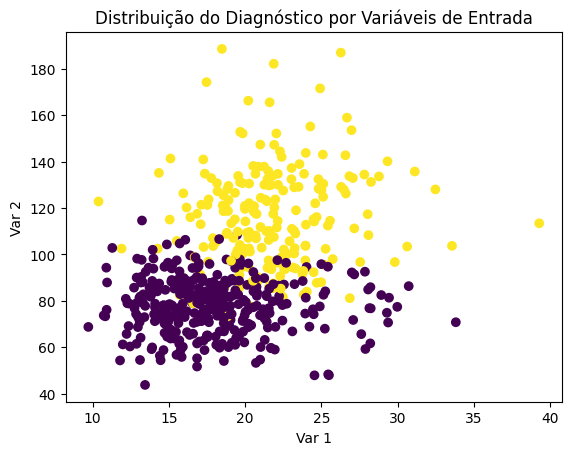

In [ ]:
# plotando o gráfico para verificação da distribuição amostral das variáveis do dataset
X = df.iloc[:,:].values # transformando o df em ndarray para usar no scatter
pl = plt
pl.scatter(X[:,2],X[:,3],c=y)
pl.title("Distribuição do Diagnóstico por Variáveis de Entrada" )
pl.xlabel('Var 1')
pl.ylabel('Var 2')
pl.show

## Separando os Dados para Treinamento e Teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Construindo e Testando o Modelo

In [ ]:
p = Perceptron()
p.fit(X_train, y_train)

Perceptron()

In [ ]:
y_pred = p.predict(X_test)

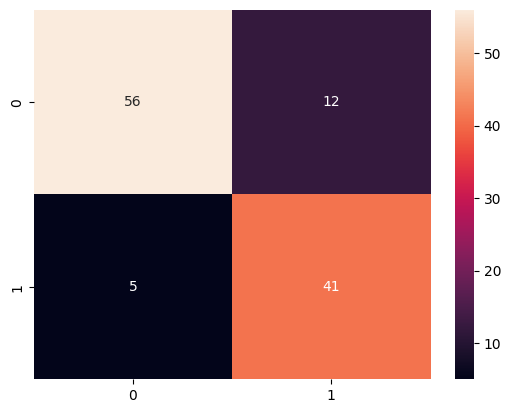

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()

## Apresentação das Métricas dos Testes Validados

In [ ]:
test_score = accuracy_score(y_pred, y_test)
print("Acurácia dos testes: ", test_score)

print(classification_report(y_pred, y_test))

print("Número de épocas no treinamento: ", p.n_iter_)
print("Lista de parâmetros configurados na Perceptron: ", p.get_params())

Acurácia dos testes:  0.8508771929824561
              precision    recall  f1-score   support

           0       0.82      0.92      0.87        61
           1       0.89      0.77      0.83        53

    accuracy                           0.85       114
   macro avg       0.86      0.85      0.85       114
weighted avg       0.86      0.85      0.85       114

Número de épocas no treinamento:  19
Lista de parâmetros configurados na Perceptron:  {'alpha': 0.0001, 'class_weight': None, 'early_stopping': False, 'eta0': 1.0, 'fit_intercept': True, 'l1_ratio': 0.15, 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': None, 'random_state': 0, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
